In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Pritam Laskar/Documents/PGCM - DA/Term II/Term II Study Materials/205 Ridge Regression/Case 01 - Customer Churn/ML+01+Ridge+Regession+Dataset+1.csv")

In [3]:
df

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0


# Data Cleaning and EDA

In [4]:
df.duplicated().sum()

0

In [5]:
(df.isnull().sum()/len(df))*100

Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
Outcome             76.050
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64

In [6]:
df.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [7]:
df.drop(['Outcome'], axis = 1, inplace = True)
df['Communication'] = df['Communication'].fillna(df['Communication'].mode().values[0])
df['Education'] = df['Education'].fillna(df['Education'].mode().values[0])
df['Job'] = df['Job'].fillna(df['Job'].mode().values[0])

In [8]:
(df.isnull().sum()/len(df))*100

Id                  0.0
Age                 0.0
Job                 0.0
Marital             0.0
Education           0.0
Default             0.0
Balance             0.0
HHInsurance         0.0
CarLoan             0.0
Communication       0.0
LastContactDay      0.0
LastContactMonth    0.0
NoOfContacts        0.0
DaysPassed          0.0
PrevAttempts        0.0
CallStart           0.0
CallEnd             0.0
CarInsurance        0.0
dtype: float64

In [9]:
df.drop(['Id'], axis = 1, inplace = True)
df.drop(['CallStart'], axis = 1, inplace = True)
df.drop(['CallEnd'], axis = 1, inplace = True)

In [10]:
df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


### Outlier Removal & Further Cleaning

In [11]:
# We will make a loop to replace outliers with UL and LL:

columns = ['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance']

Q3 = df[columns].quantile(.75)
Q1 = df[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*(IQR)
LL = Q1 - 1.5*(IQR)

for column in columns:
    df[column] = np.where(df[column] > UL[column], UL[column], np.where(df[column] < LL[column], LL[column], df[column]))

In [12]:
# Our data now without outliers:

df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.0,4000.000000,4000.00000,4000.0,4000.000000,4000.000000,4000.0,4000.0,4000.000000
mean,41.153000,0.0,1069.110250,0.49275,0.0,15.721250,2.261750,-1.0,0.0,0.401000
std,11.347777,0.0,1286.778413,0.50001,0.0,8.425307,1.528666,0.0,0.0,0.490162
min,18.000000,0.0,-2151.000000,0.00000,0.0,1.000000,1.000000,-1.0,0.0,0.000000
25%,32.000000,0.0,111.000000,0.00000,0.0,8.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,0.0,551.500000,0.00000,0.0,16.000000,2.000000,-1.0,0.0,0.000000
75%,49.000000,0.0,1619.000000,1.00000,0.0,22.000000,3.000000,-1.0,0.0,1.000000
max,74.500000,0.0,3881.000000,1.00000,0.0,31.000000,6.000000,-1.0,0.0,1.000000


In [13]:
df['Default'].value_counts()

0.0    4000
Name: Default, dtype: int64

In [14]:
df['HHInsurance'].value_counts()

0.0    2029
1.0    1971
Name: HHInsurance, dtype: int64

In [15]:
df['DaysPassed'].value_counts()

-1.0    4000
Name: DaysPassed, dtype: int64

In [16]:
df['PrevAttempts'].value_counts()

0.0    4000
Name: PrevAttempts, dtype: int64

In [17]:
df['CarLoan'].value_counts()

0.0    4000
Name: CarLoan, dtype: int64

In [18]:
# We can drop the following columns:

df.drop(['Default'], axis = 1, inplace = True)
df.drop(['DaysPassed'], axis = 1, inplace = True)
df.drop(['PrevAttempts'], axis = 1, inplace = True)
df.drop(['CarLoan'], axis = 1, inplace = True)

In [19]:
df['Balance'] = df['Balance'].astype(int)
df['HHInsurance'] = df['HHInsurance'].astype(int)
df['LastContactDay'] = df['LastContactDay'].astype(int)
df['NoOfContacts'] = df['NoOfContacts'].astype(int)
df['CarInsurance'] = df['CarInsurance'].astype(int)
df['Age'] = df['Age'].astype(int)

In [20]:
df.head()

,Age,Job,Marital,Education,Balance,HHInsurance,Communication,LastContactDay,LastContactMonth,NoOfContacts,CarInsurance
0,32,management,single,tertiary,1218,1,telephone,28,jan,2,0
1,32,blue-collar,married,primary,1156,1,cellular,26,may,5,0
2,29,management,single,tertiary,637,1,cellular,3,jun,1,1
3,25,student,single,primary,373,1,cellular,11,may,2,1
4,30,management,married,tertiary,2694,0,cellular,3,jun,1,0


# Univariate Analysis

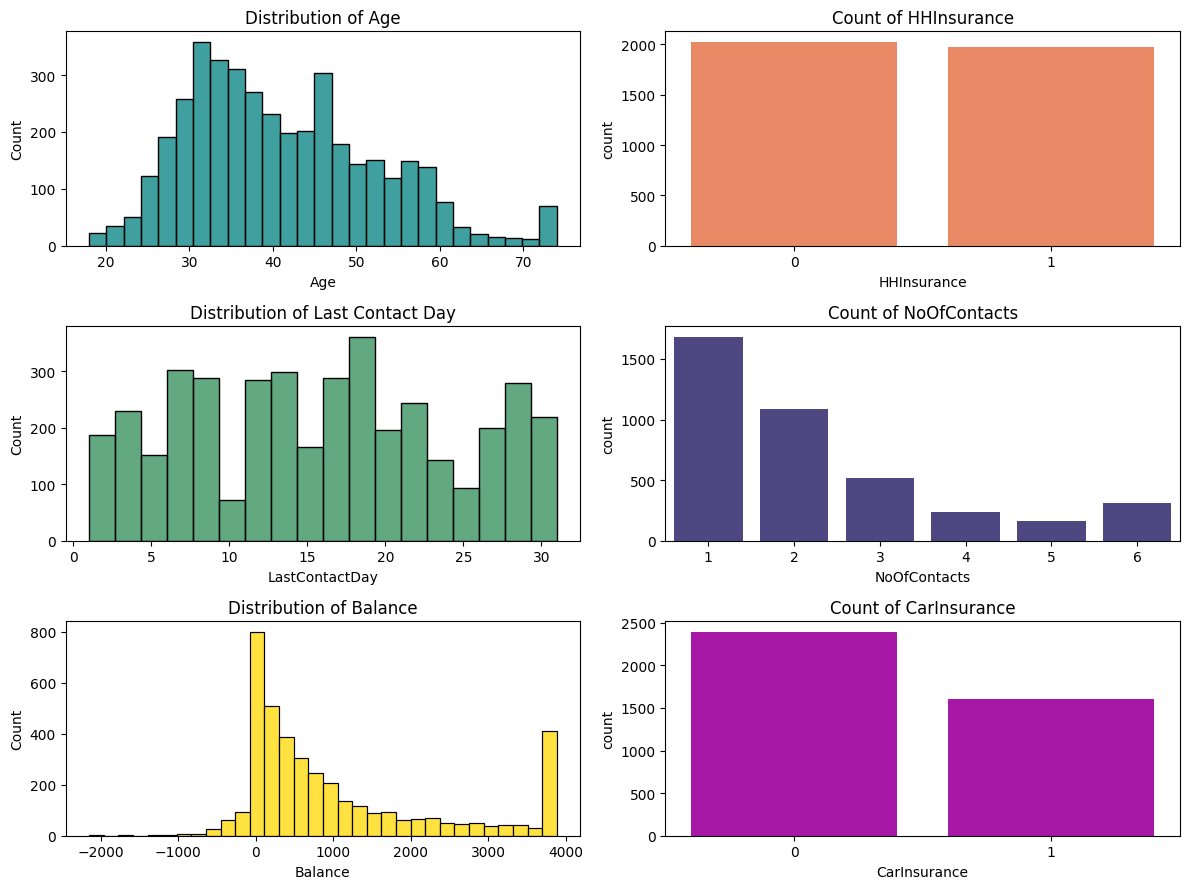

In [21]:
# Distributions

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12,9))

# Subplot 1: Age
sns.histplot(data = df, x = 'Age', color = 'teal', ax=axes[0,0])
axes[0,0].set_title('Distribution of Age');

# Subplot 2: HHInsurance
sns.countplot(data = df, x = 'HHInsurance', color = 'coral', ax=axes[0,1])
axes[0,1].set_title('Count of HHInsurance');

# Subplot 3: LastContactDay
sns.histplot(data = df, x = 'LastContactDay', color = 'seagreen', ax=axes[1,0])
axes[1,0].set_title('Distribution of Last Contact Day');

# Subplot 4: NoOfContacts
sns.countplot(data = df, x = 'NoOfContacts', color  = 'darkslateblue', ax=axes[1,1])
axes[1,1].set_title('Count of NoOfContacts');

# Subplot 5: Balance
sns.histplot(data = df, x = 'Balance', color = 'gold', ax=axes[2,0])
axes[2,0].set_title('Distribution of Balance');

# Subplot 6: CarInsurance
sns.countplot(data = df, x = 'CarInsurance', color = 'm', ax=axes[2,1])
axes[2,1].set_title('Count of CarInsurance');

plt.tight_layout()
plt.show()

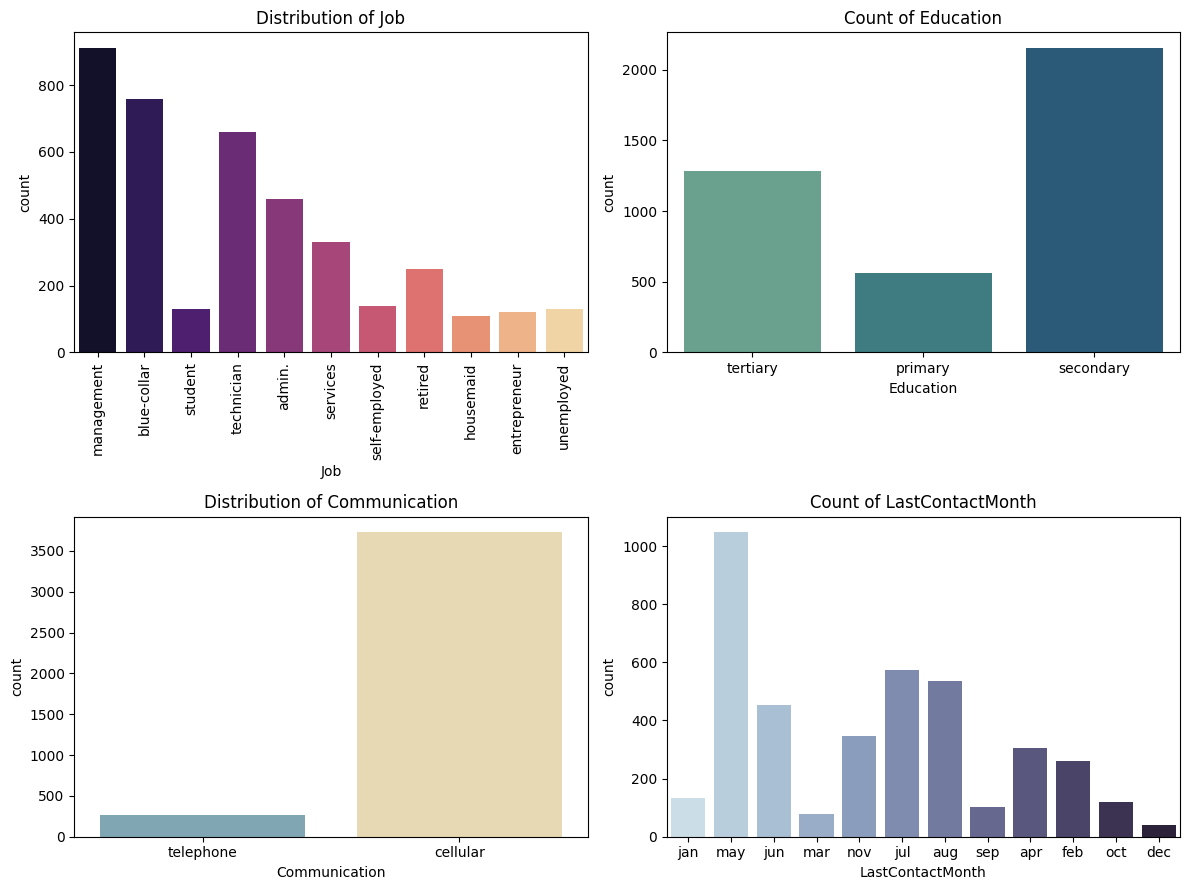

In [22]:
# Countplots

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,9))

# Subplot 1: Job
sns.countplot(data = df, x = 'Job', palette = 'magma', ax=axes[0,0])
axes[0,0].set_title('Distribution of Job');
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90);

# Subplot 2: Education
sns.countplot(data = df, x = 'Education', palette = 'crest', ax=axes[0,1])
axes[0,1].set_title('Count of Education');

# Subplot 3: Communication
sns.countplot(data = df, x = 'Communication', palette = 'blend:#7AB,#EDA', ax=axes[1,0])
axes[1,0].set_title('Distribution of Communication');

# Subplot 4: LastContactMonth
sns.countplot(data = df, x = 'LastContactMonth', palette  = 'ch:s=.25,rot=-.25', ax=axes[1,1])
axes[1,1].set_title('Count of LastContactMonth');

plt.tight_layout()
plt.show()

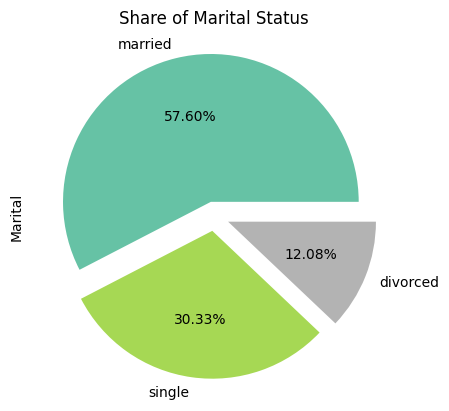

In [23]:
# Pie - Marital

df['Marital'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0.1,0.1,0.1], cmap = 'Set2');
plt.title('Share of Marital Status');

# Multivariate Analysis

C:\Users\Pritam Laskar\AppData\Local\Temp\ipykernel_1320\3822170940.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation = 90);
C:\Users\Pritam Laskar\AppData\Local\Temp\ipykernel_1320\3822170940.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(), rotation = 90);


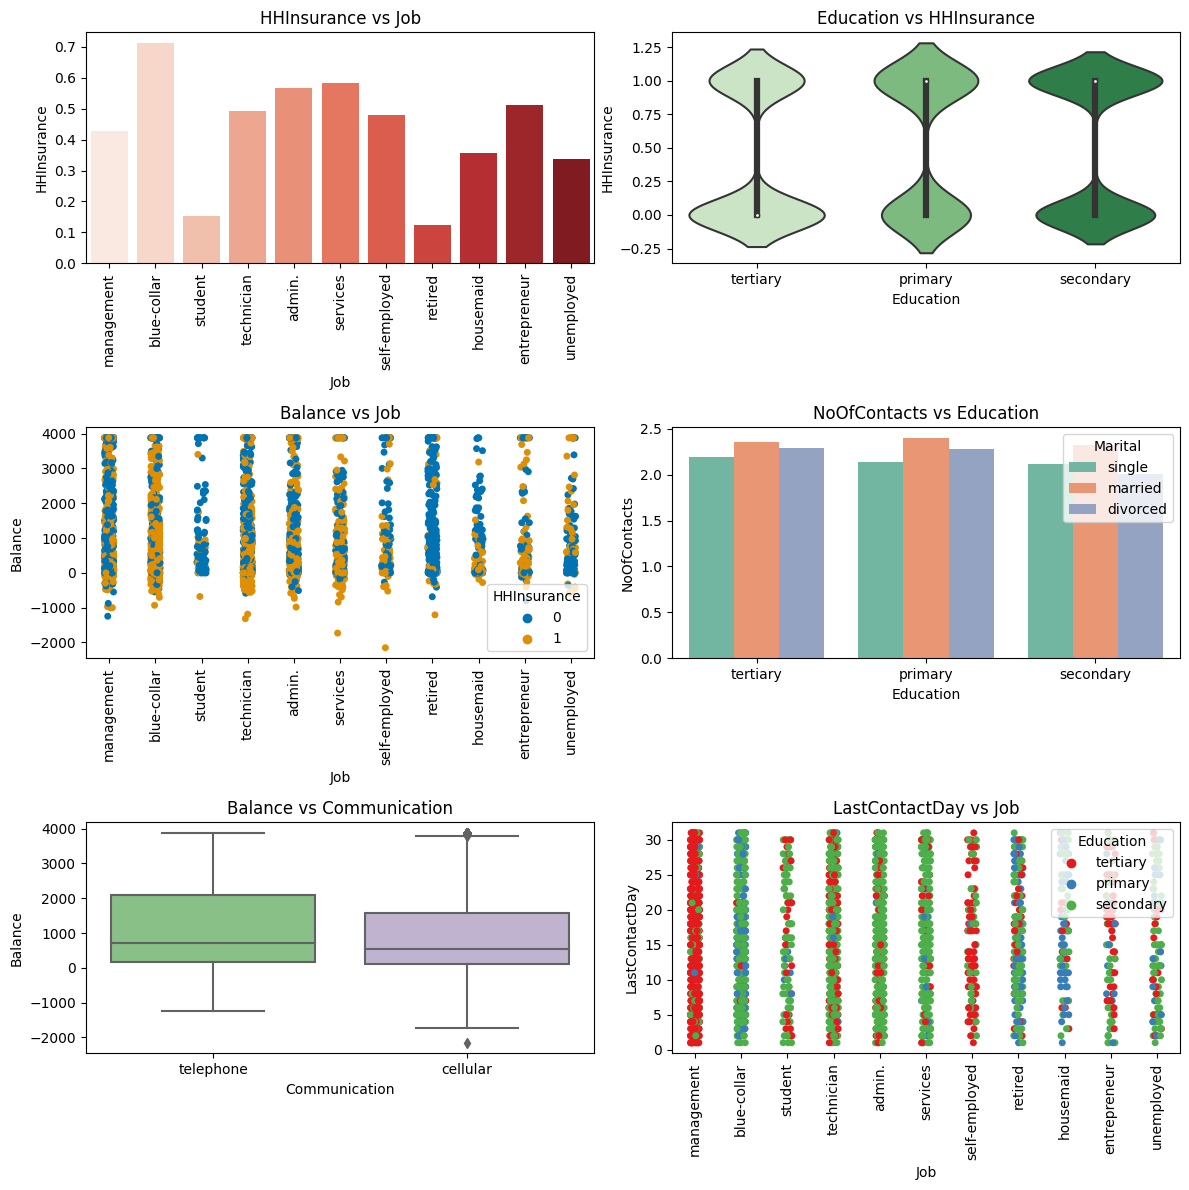

In [24]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 12))

# Subplot 1: HHInsurance vs Job
sns.barplot(data = df, x = 'Job', y = 'HHInsurance', palette = 'Reds', ax=axes[0,0], errorbar = None)
axes[0,0].set_title('HHInsurance vs Job');
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation = 90);

# Subplot 2: Education vs HHInsurance
sns.violinplot(data = df, x = 'Education', y = 'HHInsurance', palette = 'Greens', ax=axes[0,1])
axes[0,1].set_title('Education vs HHInsurance');

# Subplot 3: Balance vs Job
sns.stripplot(data = df, x = 'Job', y = 'Balance', palette = 'colorblind', hue = 'HHInsurance', ax=axes[1,0])
axes[1,0].set_title('Balance vs Job');
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation = 90);

# Subplot 4: NoOfContacts vs Education
sns.barplot(data = df, y = 'NoOfContacts', x = 'Education', hue = 'Marital', palette = 'Set2', ax=axes[1,1], errorbar = None)
axes[1,1].set_title('NoOfContacts vs Education');

# Subplot 5: Balance vs Communication
sns.boxplot(data = df, y = 'Balance', x = 'Communication', ax=axes[2,0], palette = 'Accent')
axes[2,0].set_title('Balance vs Communication');

# Subplot 6: LastContactDay vs Job
sns.stripplot(data = df, x = 'Job', y = 'LastContactDay', hue = 'Education', palette = 'Set1', ax=axes[2,1])
axes[2,1].set_title('LastContactDay vs Job');
axes[2,1].set_xticklabels(axes[2,1].get_xticklabels(), rotation = 90);

plt.tight_layout()
plt.show()

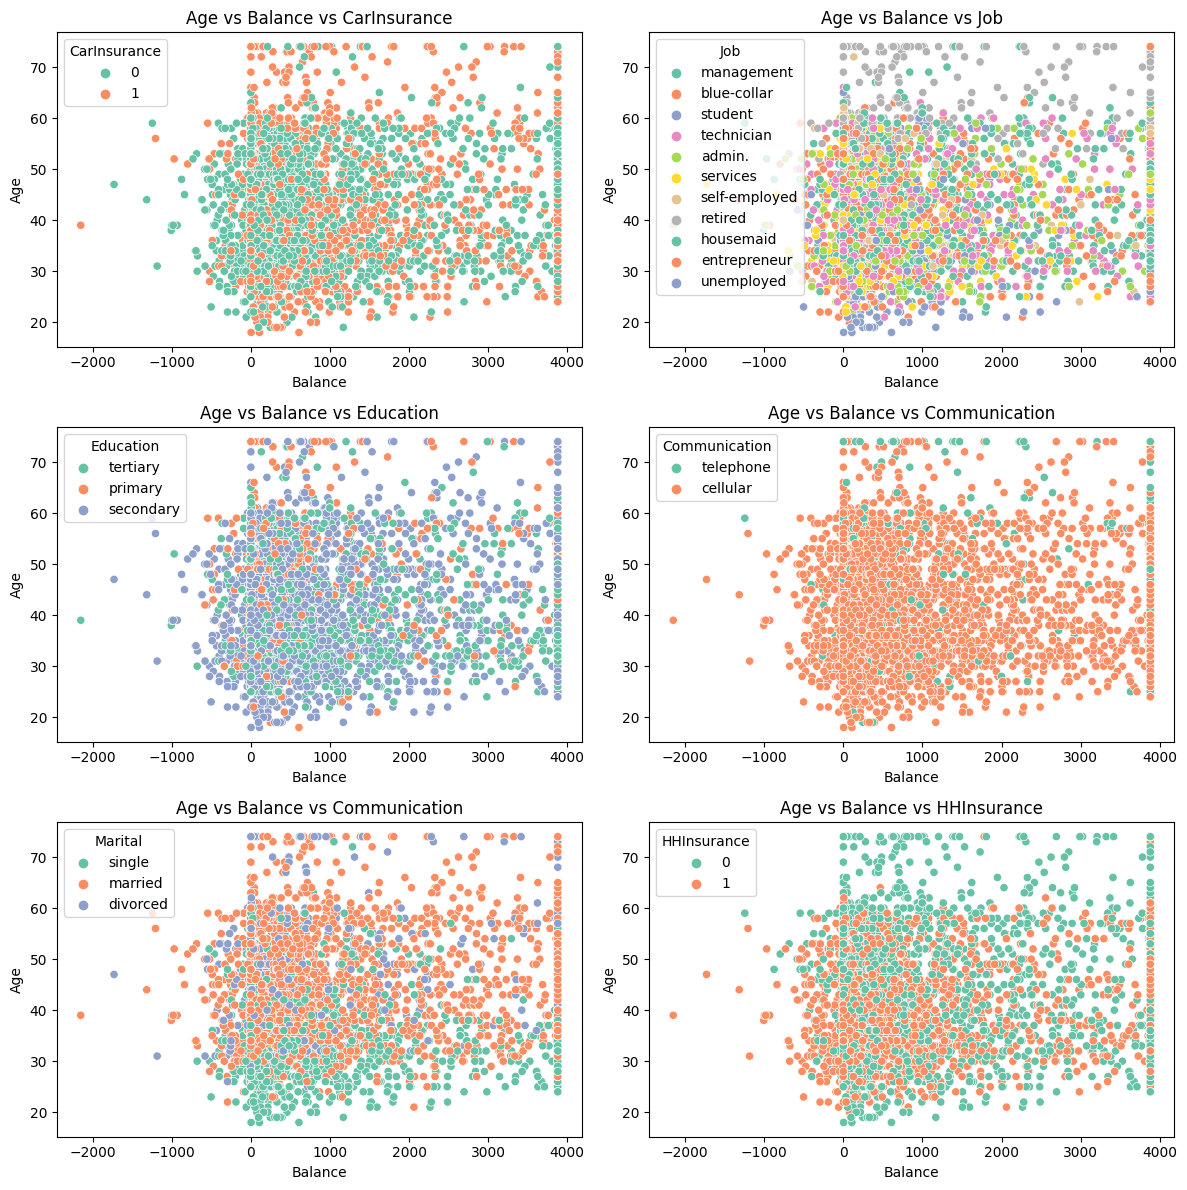

In [25]:
# Scatterplot - Age vs Balance

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12,12))

# Subplot 1 - Age vs Balance (CarInsurance)
sns.scatterplot(data = df, x = 'Balance', y = 'Age', hue = 'CarInsurance', palette = 'Set2', ax=axes[0,0]);
axes[0,0].set_title('Age vs Balance vs CarInsurance');

# Subplot 2 - Age vs Balance (Job)
sns.scatterplot(data = df, x = 'Balance', y = 'Age', hue = 'Job', palette = 'Set2', ax=axes[0,1]);
axes[0,1].set_title('Age vs Balance vs Job');

# Subplot 3 - Age vs Balance (Education)
sns.scatterplot(data = df, x = 'Balance', y = 'Age', hue = 'Education', palette = 'Set2', ax=axes[1,0]);
axes[1,0].set_title('Age vs Balance vs Education');

# Subplot 4 - Age vs Balance (Communication)
sns.scatterplot(data = df, x = 'Balance', y = 'Age', hue = 'Communication', palette = 'Set2', ax=axes[1,1]);
axes[1,1].set_title('Age vs Balance vs Communication');

# Subplot 5 - Age vs Balance (Marital)
sns.scatterplot(data = df, x = 'Balance', y = 'Age', hue = 'Marital', palette = 'Set2', ax=axes[2,0]);
axes[2,0].set_title('Age vs Balance vs Communication');

# Subplot 5 - Age vs Balance (HHInsurance)
sns.scatterplot(data = df, x = 'Balance', y = 'Age', hue = 'HHInsurance', palette = 'Set2', ax=axes[2,1]);
axes[2,1].set_title('Age vs Balance vs HHInsurance');

plt.tight_layout()
plt.show()

# Converting Categorical Data to Numeric using LabelEncoder

In [26]:
x = df.drop(['CarInsurance'], axis = 1)
y = df['CarInsurance']

In [27]:
x

,Age,Job,Marital,Education,Balance,HHInsurance,Communication,LastContactDay,LastContactMonth,NoOfContacts
0,32,management,single,tertiary,1218,1,telephone,28,jan,2
1,32,blue-collar,married,primary,1156,1,cellular,26,may,5
2,29,management,single,tertiary,637,1,cellular,3,jun,1
3,25,student,single,primary,373,1,cellular,11,may,2
4,30,management,married,tertiary,2694,0,cellular,3,jun,1
...,...,...,...,...,...,...,...,...,...,...
3995,28,technician,single,tertiary,0,1,cellular,25,may,1
3996,49,admin.,divorced,secondary,124,1,cellular,29,jul,6
3997,27,admin.,single,secondary,-400,0,cellular,8,jul,1
3998,36,entrepreneur,single,tertiary,658,1,cellular,29,jan,1


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth']:
    x[i] = encoder.fit_transform(x[i])

In [29]:
x

,Age,Job,Marital,Education,Balance,HHInsurance,Communication,LastContactDay,LastContactMonth,NoOfContacts
0,32,4,2,2,1218,1,1,28,4,2
1,32,1,1,0,1156,1,0,26,8,5
2,29,4,2,2,637,1,0,3,6,1
3,25,8,2,0,373,1,0,11,8,2
4,30,4,1,2,2694,0,0,3,6,1
...,...,...,...,...,...,...,...,...,...,...
3995,28,9,2,2,0,1,0,25,8,1
3996,49,0,0,1,124,1,0,29,5,6
3997,27,0,2,1,-400,0,0,8,5,1
3998,36,2,2,2,658,1,0,29,4,1


# Checking Multicollinearity

<Axes: >

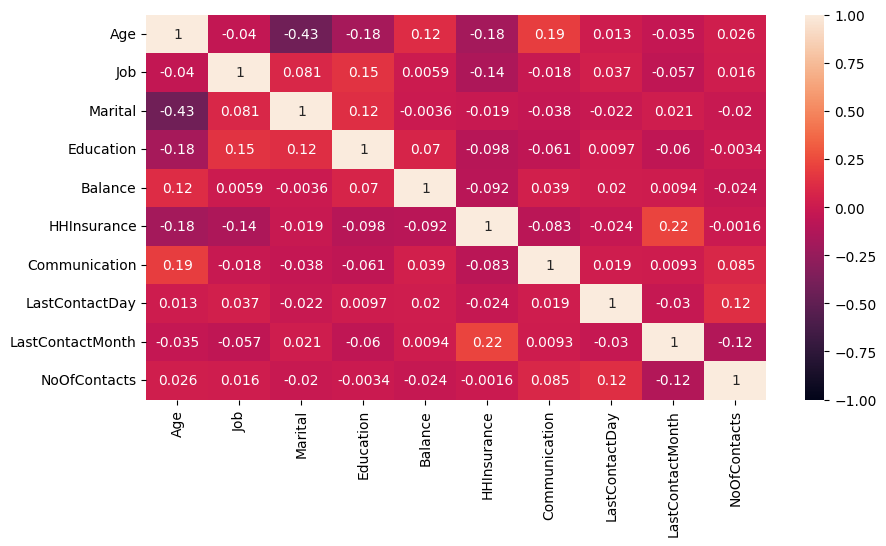

In [30]:
plt.figure(figsize = (10,5));
sns.heatmap(x.corr(), vmin = -1, vmax = 1, annot = True)

As none of the columns have a high correlation (0.75 +), we can go ahead with further analysis and our model.

# Data Scaling and Classification

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 10)

### Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)

# Transforming training and test data
x_train2 = sc.transform(x_train)
x_test2 = sc.transform(x_test)

### Ridge Regression (L2)

- By default, LogisticRegression runs on 'l2' parameter which means 'Ridge'.

In [33]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train2, y_train)
y_pred = lr.predict(x_test2)
y_predr1 = lr.predict(x_train2)

In [34]:
# Transform data using fitted StandardScaler

x_test_transformed = pd.DataFrame(sc.transform(x_test), index = x_test.index, columns = x_test.columns)

# Retrieve coefficient from LogisticRegression model
LogisticCoeff = pd.concat([pd.DataFrame(x_test_transformed.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
LogisticCoeff.columns = ['Variable', 'Coefficient']
LogisticCoeff

,Variable,Coefficient
0,Age,0.043035
1,Job,0.130246
2,Marital,0.099801
3,Education,0.125641
4,Balance,0.135223
5,HHInsurance,-0.406875
6,Communication,0.055116
7,LastContactDay,-0.111414
8,LastContactMonth,0.008749
9,NoOfContacts,-0.247893


### Lasso Regression (L1)

In [35]:
lr = LogisticRegression(penalty = 'l1', solver = 'liblinear')
lr.fit(x_train2, y_train)
y_predL1 = lr.predict(x_test2)
y_predli = lr.predict(x_train2)

x_test_transformed = pd.DataFrame(sc.transform(x_test), index = x_test.index, columns = x_test.columns)
LassoCoeff = pd.concat([pd.DataFrame(x_test_transformed.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)

LassoCoeff.columns = ['Variable', 'Coefficient']
LassoCoeff

,Variable,Coefficient
0,Age,0.040566
1,Job,0.128805
2,Marital,0.097595
3,Education,0.124005
4,Balance,0.134224
5,HHInsurance,-0.406179
6,Communication,0.053906
7,LastContactDay,-0.109874
8,LastContactMonth,0.007141
9,NoOfContacts,-0.246614


In [36]:
from sklearn.metrics import accuracy_score
print('Lasso Accuracy Test = ', accuracy_score(y_test, y_predL1))
print('Lasso Accuracy Train = ', accuracy_score(y_train, y_predli))
print('Ridge Accuracy Test = ', accuracy_score(y_test, y_pred))
print('Ridge Accuracy Train = ', accuracy_score(y_train, y_predr1))

Lasso Accuracy Test =  0.6441666666666667
Lasso Accuracy Train =  0.6478571428571429
Ridge Accuracy Test =  0.645
Ridge Accuracy Train =  0.6475


In [37]:
# Lets make a dataframe to compare y_pred and y_test (Ridge)

pred_data = pd.DataFrame(np.column_stack((y_pred, y_test)), columns=['Prediction', 'Test'])
pred_data

,Prediction,Test
0,0,0
1,1,0
2,0,1
3,1,0
4,0,0
...,...,...
1195,0,0
1196,0,1
1197,0,0
1198,1,0
